In [1]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("Datasets/Processed.csv", index_col=0)

In [36]:
df

,year,month,max_temp,min_temp,diff_temp,max_1,max_2,max_3,max_4,max_5,min_1,min_2,min_3,min_4,min_5,diff_1,diff_2,diff_3,diff_4,diff_5
day,,,,,,,,,,,,,,,,,,,,
6,2009,1,20.6,9.8,10.8,18.8,20.5,20.6,19.2,19.8,8.8,7.8,6.8,5.8,4.8,10.0,12.7,13.8,13.4,15.0
7,2009,1,21.0,10.8,10.2,20.6,18.8,20.5,20.6,19.2,9.8,8.8,7.8,6.8,5.8,10.8,10.0,12.7,13.8,13.4
8,2009,1,20.4,11.8,8.6,21.0,20.6,18.8,20.5,20.6,10.8,9.8,8.8,7.8,6.8,10.2,10.8,10.0,12.7,13.8
9,2009,1,22.2,12.8,9.4,20.4,21.0,20.6,18.8,20.5,11.8,10.8,9.8,8.8,7.8,8.6,10.2,10.8,10.0,12.7
10,2009,1,21.5,13.8,7.7,22.2,20.4,21.0,20.6,18.8,12.8,11.8,10.8,9.8,8.8,9.4,8.6,10.2,10.8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2019,12,15.7,1.2,14.5,15.8,16.7,17.5,18.8,20.3,0.9,2.9,3.2,3.0,4.2,14.9,13.8,14.3,15.8,16.1
28,2019,12,16.3,0.6,15.7,15.7,15.8,16.7,17.5,18.8,1.2,0.9,2.9,3.2,3.0,14.5,14.9,13.8,14.3,15.8
29,2019,12,18.1,1.0,17.1,16.3,15.7,15.8,16.7,17.5,0.6,1.2,0.9,2.9,3.2,15.7,14.5,14.9,13.8,14.3


In [6]:
corr_matrix = df.corr()
corr_matrix["min_temp"].sort_values(ascending=False)

min_temp     1.000000
min_1        0.974303
min_2        0.960598
min_3        0.951772
min_4        0.945742
min_5        0.940240
max_3        0.799135
max_2        0.798739
max_4        0.795439
max_1        0.795043
max_5        0.793486
max_temp     0.777798
month        0.169745
year         0.008871
day          0.002424
diff_5      -0.604176
diff_4      -0.610730
diff_3      -0.618278
diff_2      -0.633390
diff_1      -0.657850
diff_temp   -0.717539
Name: min_temp, dtype: float64

In [25]:
x = df.drop(["min_temp", "day", "month", "year", "max_temp", "diff_temp","diff_1", "diff_2", "diff_3", "diff_4", "diff_5"], axis=1)

In [26]:
x.columns

Index(['max_1', 'max_2', 'max_3', 'max_4', 'max_5', 'min_1', 'min_2', 'min_3',
       'min_4', 'min_5'],
      dtype='object')

In [27]:
y=df["min_temp"]

In [28]:
x.shape

(3357, 10)

In [29]:
test_percentage = 0.8
test_size = int(df.shape[0]*test_percentage)
x_train, x_test , y_train, y_test = x[:test_size], x[test_size:], y[:test_size].to_numpy().ravel(), y[test_size:].to_numpy().ravel()

In [30]:
from linear_regression  import linearRegression
lin_reg = linearRegression(learning_rate=0.0001)
w,b,l = lin_reg.fit(x_train, y_train)

Loss: 1.8938744276492436


In [31]:
import matplotlib.pyplot as plt

In [32]:
pred = lin_reg.predict(x_test)

In [33]:
rms = np.sqrt(np.mean((pred-y_test)**2))
rms

8.662774238384412

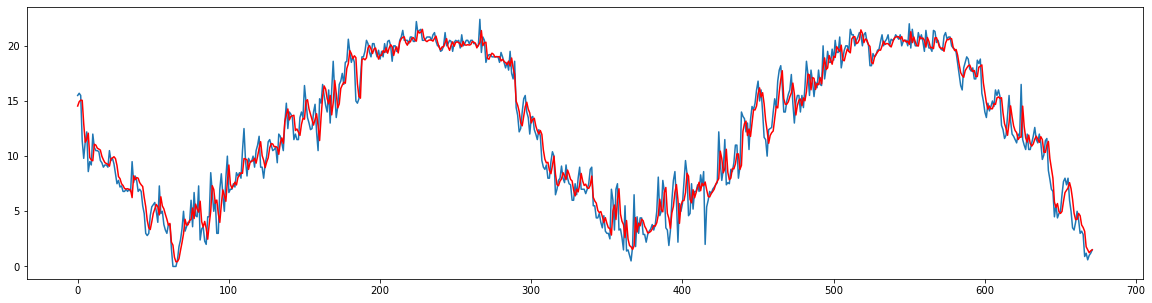

In [17]:
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(pred, "r")

In [44]:
comp = pd.DataFrame({"Actual": y_test.ravel(), "pred": pred.ravel()})
comp.to_csv("Datasets/MinPrediction.csv")

In [42]:
import joblib
file_name = "minModel.sav"
joblib.dump(lin_reg, file_name)

['minModel.sav']